In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
pd.set_option('max_columns',1000)
pd.set_option('max_row',300)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# read data

In [3]:
#查看data
train_df= pd.read_table("./data/train.txt",header = None, delim_whitespace=True)
test_df= pd.read_table("./data/test.txt",header = None, delim_whitespace=True)
final_test_df= pd.read_table("./data/final_test.txt",header = None, delim_whitespace=True)

C:\Users\gaoyuting\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
C:\Users\gaoyuting\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gaoyuting\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


In [35]:
column_name = ['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
               's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
               's15', 's16', 's17', 's18', 's19', 's20', 's21']
train_df.columns = column_name
test_df.columns = column_name
final_test_df.columns = column_name

ValueError: Length mismatch: Expected axis has 48 elements, new values have 26 elements

# check data

In [ ]:
train_df.describe()

In [6]:
test_df.describe()

,engine_id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000
mean,109.87401,81.86556,24.07621,0.57324,48.92757,472.77882,579.36570,1417.74318,1201.99581,8.01437,11.57403,282.10475,2228.53886,8519.92863,1.09463,42.88281,265.58417,2334.53394,8063.75478,9.31628,0.02310,347.71610,2228.50758,97.75769,20.77684,12.46574
std,62.81785,57.78525,14.76155,0.30996,32.48978,26.40509,37.26475,105.77559,118.72518,3.61698,5.43543,146.15036,145.10242,335.23213,0.12732,3.21943,137.78348,128.05174,83.96796,0.74706,0.00462,27.69189,145.21529,5.36326,9.88989,5.93448
min,1.00000,1.00000,0.00000,0.00000,0.00000,445.00000,535.72000,1243.78000,1029.03000,3.91000,5.71000,137.14000,1915.00000,7983.34000,0.93000,36.26000,129.35000,2027.86000,7854.11000,8.34340,0.02000,304.00000,1915.00000,84.93000,10.12000,6.12440
25%,55.00000,35.00000,10.00470,0.25070,20.00000,445.00000,549.46000,1351.49000,1122.07000,3.91000,5.72000,139.67750,2211.87000,8320.25000,1.02000,41.86000,131.34000,2387.90000,8061.71000,8.66300,0.02000,330.00000,2212.00000,100.00000,10.84000,6.50455
50%,112.00000,72.00000,25.00150,0.70000,40.00000,462.54000,555.80000,1366.84000,1133.30000,7.05000,9.03000,194.73000,2223.02000,8354.98500,1.02000,42.22000,183.26000,2388.06000,8080.55000,9.30340,0.02000,334.00000,2223.00000,100.00000,14.90000,8.93410
75%,164.00000,118.00000,41.99810,0.84000,80.00000,491.19000,607.23000,1497.78250,1304.74000,10.52000,15.49000,394.33000,2323.94000,8776.06250,1.26000,45.29000,371.46000,2388.13000,8125.89000,9.37140,0.03000,369.00000,2324.00000,100.00000,28.52000,17.11123
max,218.00000,364.00000,42.00800,0.84200,100.00000,518.67000,644.04000,1606.64000,1431.08000,14.62000,21.61000,555.61000,2388.28000,9158.70000,1.30000,48.19000,523.32000,2389.80000,8226.66000,11.01710,0.03000,397.00000,2388.00000,100.00000,39.33000,23.59160


In [7]:
final_test_df.head()

,engine_id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,10.00470,0.25010,20.00000,489.05000,605.02000,1498.72000,1304.90000,10.52000,15.49000,394.90000,2318.93000,8770.87000,1.26000,45.47000,371.83000,2388.12000,8128.58000,8.64020,0.03000,371,2319,100.00000,28.52000,17.06530
1,1,2,0.00150,0.00030,100.00000,518.67000,642.69000,1592.90000,1405.35000,14.62000,21.61000,554.15000,2388.03000,9046.61000,1.30000,47.46000,521.88000,2388.09000,8128.07000,8.42860,0.03000,392,2388,100.00000,38.95000,23.36090
2,1,3,34.99860,0.84010,60.00000,449.44000,555.49000,1357.71000,1127.52000,5.48000,8.00000,194.57000,2222.86000,8340.55000,1.02000,41.80000,182.97000,2387.92000,8060.07000,9.30650,0.02000,333,2223,100.00000,14.91000,8.81850
3,1,4,20.00310,0.70050,0.00000,491.19000,607.62000,1479.86000,1257.25000,9.35000,13.65000,334.19000,2323.95000,8721.01000,1.07000,44.22000,315.29000,2388.09000,8060.00000,9.23810,0.02000,365,2324,100.00000,24.35000,14.70750
4,1,5,42.00410,0.84050,40.00000,445.00000,549.69000,1354.17000,1124.17000,3.91000,5.72000,139.03000,2211.76000,8318.64000,1.02000,41.98000,130.50000,2387.84000,8080.66000,9.39500,0.02000,331,2212,100.00000,10.67000,6.48370


# Feature extention

## Difference with previous row

In [8]:
def cal_diff(df, sensor_name,diff_periods = 40):
    sensor_diff = []
    sensor_diff_temp = []
    for _id in set(df['engine_id']):
        traindf_of_one_id =  df[df['engine_id'] == _id]
        s = pd.Series(traindf_of_one_id[sensor_name])
        #判断每一个数列的长度是否大于diff_periods
        if len(s)>diff_periods:
            sensor_diff_temp=s.diff(periods=diff_periods)
            # 第0到39 应该是每一个值-第一个值
            for i in range(diff_periods):
                sensor_diff.append(s.iloc[i]-s.iloc[0])
            # 第40个值之后应该是每一个值-向前推40位的值
            for j in range (len(s)-diff_periods):
                sensor_diff.append(sensor_diff_temp.iloc[diff_periods+j])
        else:
            for h in range(len(s)):
                sensor_diff.append(s.iloc[h]-s.iloc[0])
    return sensor_diff

In [9]:
#get all the names of sensors
list(train_df.columns)
sensor_name = list(train_df.columns)
sensor_name = sensor_name[5:]


In [10]:
for i in range(len(sensor_name)):
    sensor_name_temp = sensor_name[i]
    diff = cal_diff(train_df,sensor_name=sensor_name_temp) 
    name = sensor_name_temp+'_diff'
    train_df[name] = diff

In [11]:
for i in range(len(sensor_name)):
    sensor_name_temp = sensor_name[i]
    diff = cal_diff(test_df,sensor_name=sensor_name_temp) 
    name = sensor_name_temp+'_diff'
    test_df[name] = diff

In [12]:
for i in range(len(sensor_name)):
    sensor_name_temp = sensor_name[i]
    diff = cal_diff(final_test_df,sensor_name=sensor_name_temp) 
    name = sensor_name_temp+'_diff'
    final_test_df[name] = diff

In [13]:
test_df.describe()

,engine_id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s1_diff,s2_diff,s3_diff,s4_diff,s5_diff,s6_diff,s7_diff,s8_diff,s9_diff,s10_diff,s11_diff,s12_diff,s13_diff,s14_diff,s15_diff,s16_diff,s17_diff,s18_diff,s19_diff,s20_diff,s21_diff
count,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000,29820.00000
mean,109.87401,81.86556,24.07621,0.57324,48.92757,472.77882,579.36570,1417.74318,1201.99581,8.01437,11.57403,282.10475,2228.53886,8519.92863,1.09463,42.88281,265.58417,2334.53394,8063.75478,9.31628,0.02310,347.71610,2228.50758,97.75769,20.77684,12.46574,-1.17627,-1.55452,-3.04977,-2.58146,-0.12333,-0.18592,-4.97158,-4.34514,-10.46690,-0.00255,-0.04936,-4.65071,-1.59542,0.77116,0.01843,0.00003,-0.79648,-4.36784,-0.06772,-0.35392,-0.20973
std,62.81785,57.78525,14.76155,0.30996,32.48978,26.40509,37.26475,105.77559,118.72518,3.61698,5.43543,146.15036,145.10242,335.23213,0.12732,3.21943,137.78348,128.05174,83.96796,0.74706,0.00462,27.69189,145.21529,5.36326,9.88989,5.93448,37.13810,52.59502,149.23220,167.02410,5.07519,7.63336,205.45518,204.86882,472.76024,0.17900,4.53576,193.68103,179.96214,117.32932,1.05067,0.00650,39.04556,205.02428,7.53735,13.90146,8.34102
min,1.00000,1.00000,0.00000,0.00000,0.00000,445.00000,535.72000,1243.78000,1029.03000,3.91000,5.71000,137.14000,1915.00000,7983.34000,0.93000,36.26000,129.35000,2027.86000,7854.11000,8.34340,0.02000,304.00000,1915.00000,84.93000,10.12000,6.12440,-73.67000,-107.01000,-342.96000,-373.44000,-10.71000,-15.90000,-417.15000,-473.09000,-1063.00000,-0.37000,-11.04000,-392.65000,-360.30000,-278.62000,-2.53630,-0.01000,-90.00000,-473.00000,-15.07000,-28.92000,-17.32440
25%,55.00000,35.00000,10.00470,0.25070,20.00000,445.00000,549.46000,1351.49000,1122.07000,3.91000,5.72000,139.67750,2211.87000,8320.25000,1.02000,41.86000,131.34000,2387.90000,8061.71000,8.66300,0.02000,330.00000,2212.00000,100.00000,10.84000,6.50455,-28.65000,-49.00250,-116.30000,-122.24000,-3.87000,-6.11000,-159.49000,-106.95000,-370.41250,-0.08000,-3.10000,-150.46250,-0.10000,-48.68250,-0.65032,0.00000,-30.00000,-107.00000,0.00000,-10.33000,-6.19160
50%,112.00000,72.00000,25.00150,0.70000,40.00000,462.54000,555.80000,1366.84000,1133.30000,7.05000,9.03000,194.73000,2223.02000,8354.98500,1.02000,42.22000,183.26000,2388.06000,8080.55000,9.30340,0.02000,334.00000,2223.00000,100.00000,14.90000,8.93410,0.00000,0.00000,0.12000,0.62000,0.00000,0.00000,-0.13000,0.00000,0.42000,0.00000,0.02000,-0.09000,0.01000,1.12000,0.00800,0.00000,0.00000,0.00000,0.00000,-0.03000,-0.01400
75%,164.00000,118.00000,41.99810,0.84000,80.00000,491.19000,607.23000,1497.78250,1304.74000,10.52000,15.49000,394.33000,2323.94000,8776.06250,1.26000,45.29000,371.46000,2388.13000,8125.89000,9.37140,0.03000,369.00000,2324.00000,100.00000,28.52000,17.11123,27.48000,37.60250,107.43250,118.86250,3.47000,5.66000,158.71000,106.54000,340.44500,0.08000,3.05000,149.83000,0.14000,50.74000,0.68565,0.00000,28.00000,107.00000,0.00000,10.15000,6.08585
max,218.00000,364.00000,42.00800,0.84200,100.00000,518.67000,644.04000,1606.64000,1431.08000,14.62000,21.61000,555.61000,2388.28000,9158.70000,1.30000,48.19000,523.32000,2389.80000,8226.66000,11.01710,0.03000,397.00000,2388.00000,100.00000,39.33000,23.59160,73.67000,107.17000,346.63000,383.60000,10.71000,15.90000,416.78000,473.12000,1107.85000,0.37000,11.25000,392.77000,360.68000,311.45000,2.56580,0.01000,90.00000,473.00000,15.07000,28.74000,17.31280


## standard normalization 

In [14]:
# Training 因为前两列是没有用的 engine_id cycle
mean = train_df.iloc[:, 2:].mean()
std = train_df.iloc[:, 2:].std()
std.replace(0, 1, inplace=True)
train_df.iloc[:, 2:] = (train_df.iloc[:, 2:] - mean) / std

# Testing
test_df.iloc[:, 2:] = (test_df.iloc[:, 2:] - mean) / std

# final_test 
mean = final_test_df.iloc[:, 2:].mean()
std = final_test_df.iloc[:, 2:].std()
std.replace(0, 1, inplace=True)
final_test_df.iloc[:, 2:] = (final_test_df.iloc[:, 2:] - mean) / std

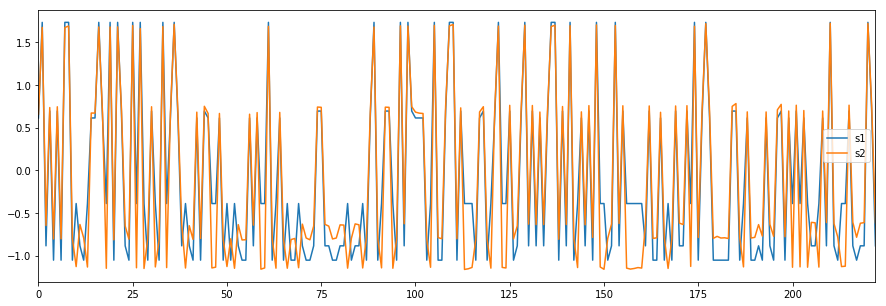

In [15]:
train_df[train_df["engine_id"]==1][["s1","s2"]].plot(figsize=(15,5));

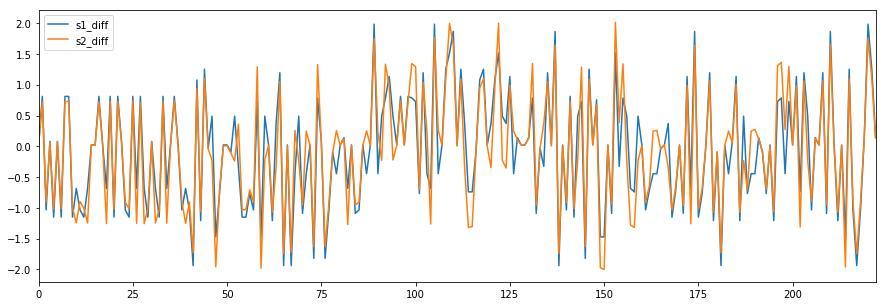

In [16]:
train_df[train_df["engine_id"]==1][["s1_diff","s2_diff"]].plot(figsize=(15,5));

## Compute the RUL

### Train

In [17]:
id='engine_id'
# 这个是自己定义的， 拐点在120 ，  120之前视为一样
MAXLIFE = 125
rul = [] # 会逐渐装满所有id的RUL
for _id in set(train_df[id]):
    train_of_one_id =  train_df[train_df[id] == _id]
    cycle_list = train_of_one_id['cycle'].tolist()
    # 因为这里是run to end ,所以最大cycle数是确定的
    max_cycle = max(cycle_list)
    # 计算出临界点的位置，没到达临界点的时候，全部保存MAXLIFE，到达临界点的时候，逐点下降！
    knee_point = max_cycle - MAXLIFE
    kink_RUL = []
    for i in range(0, len(cycle_list)):
        # 
        if i < knee_point:
            kink_RUL.append(MAXLIFE)
        else:
            tmp = max_cycle - i-1
            kink_RUL.append(tmp)
    # 每跑完一个id就添加到最后总的rul列表中
    rul.extend(kink_RUL)

train_df["RUL"] = rul

### Test

In [18]:
rul = [] # 会逐渐装满所有id的RUL
for _id in set(test_df[id]):
    test_of_one_id =  test_df[test_df[id] == _id]
    cycle_list = test_of_one_id['cycle'].tolist()
    # 因为这里是run to end ,所以最大cycle数是确定的
    max_cycle = max(cycle_list)
    # 计算出临界点的位置，没到达临界点的时候，全部保存MAXLIFE，到达临界点的时候，逐点下降！
    knee_point = max_cycle - MAXLIFE
    kink_RUL = []
    for i in range(0, len(cycle_list)):
        # 
        if i < knee_point:
            kink_RUL.append(MAXLIFE)
        else:
            tmp = max_cycle- i-1
            kink_RUL.append(tmp)
    # 每跑完一个id就添加到最后总的rul列表中
    rul.extend(kink_RUL)

test_df["RUL"] = rul

### Final Test

In [19]:
rul = [] # 会逐渐装满所有id的RUL
for _id in set(final_test_df[id]):
    final_test_of_one_id =  final_test_df[final_test_df[id] == _id]
    cycle_list = final_test_of_one_id['cycle'].tolist()
    # 因为这里是run to end ,所以最大cycle数是确定的
    max_cycle = max(cycle_list)
    # 计算出临界点的位置，没到达临界点的时候，全部保存MAXLIFE，到达临界点的时候，逐点下降！
    knee_point = max_cycle - MAXLIFE
    kink_RUL = []
    for i in range(0, len(cycle_list)):
        # 
        if i < knee_point:
            kink_RUL.append(MAXLIFE)
        else:
            tmp = max_cycle- i-1
            kink_RUL.append(tmp)
    # 每跑完一个id就添加到最后总的rul列表中
    rul.extend(kink_RUL)

final_test_df["RUL"] = rul

In [20]:
min_shape = np.min([i[0] for i in train_df.groupby("engine_id").apply(np.shape).values])
print("训练集中最小的长度是：",min_shape)

训练集中最小的长度是： 128


In [21]:
min_shape = np.min([i[0] for i in test_df.groupby("engine_id").apply(np.shape).values])
print("测试集中最小的长度是：",min_shape)

测试集中最小的长度是： 15


## split Training set and test set

training (45918, 45) (45918,)
testing (29820, 45) (29820,)


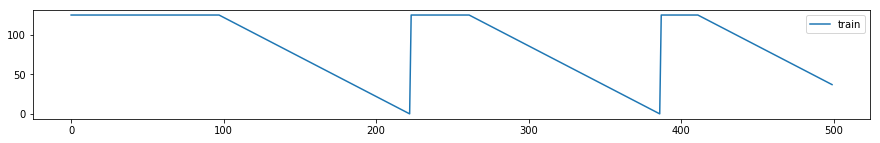

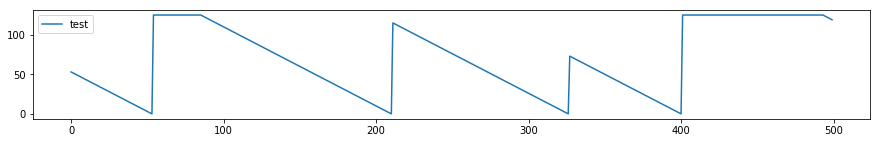

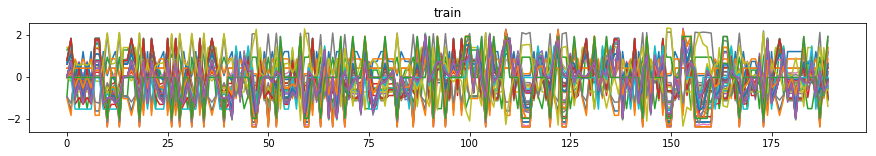

In [22]:
training_data = train_df.values
testing_data = test_df.values

x_train = training_data[:, 2:-1]
y_train = training_data[:, -1]
print("training", x_train.shape, y_train.shape)

x_test = testing_data[:, 2:-1]
y_test = testing_data[:, -1]
print("testing", x_test.shape, y_test.shape)
# 训练数据集 前面500个数据点所对应的rul 由图中可以看出  都是到零的了
plt.figure(figsize=(15,2))
plt.plot(y_train[:500], label="train")
plt.legend()
plt.figure(figsize=(15,2))
# 测试数据中前500个数据点对应的tul  可以看到结尾数据的rul 都不是中间
plt.plot(y_test[:500], label="test")
plt.legend()
plt.figure(figsize=(15,2))
plt.plot(x_train[:190])
plt.title("train" )
# 训练数据第一个id的 24个senor的值 可以通过在x轴坐标100的位置 序列的一些 趋势

plt.show()

## sliding Windows

### training set

In [23]:
sequence_length=5
window_size = 10
kernel_size = 3

In [24]:
def batch_generator(training_data, sequence_length=15, window_size = 15):
    """
    Generator function for creating random batches of training-data for many to many models
    """
    engine_ids = list(training_data["engine_id"].unique())
    temp = training_data.copy()
    # 把 每一段后一截给截掉，获取能够跑的index
    for id_ in engine_ids:
        indexes = temp[temp["engine_id"] == id_].index
        traj_data = temp.loc[indexes]
        # cutoff_cycle 记录下这以后的index就不满足 序列大小的需求的
        cutoff_cycle = max(traj_data['cycle']) - sequence_length - window_size + 1
        
        if cutoff_cycle<0:
            # 也就是步长和窗口大小已经大于了该机器的已有周期数，全部都得扔掉
            drop_range = indexes
            print("有一些数据直接就被抛弃了，请合理设置窗口大小和时间长度")
        else:
            cutoff_cycle_index = traj_data['cycle'][traj_data['cycle'] == cutoff_cycle+2].index
            drop_range = list(range(cutoff_cycle_index[0], indexes[-1] + 1))
            
        temp.drop(drop_range, inplace=True)
    indexes = temp.index
    del temp
    
    feature_number = training_data.shape[1]-3  #计算feature 个数

    x_shape = (len(indexes), sequence_length, window_size, feature_number)
    x_batch = np.zeros(shape=x_shape, dtype=np.float32)
    y_shape = (len(indexes), sequence_length)
    y_batch = np.zeros(shape=y_shape, dtype=np.float32)
    
    # 第一个数据集
    alt_index = indexes[0]
    for batch_index, index in enumerate(indexes):
        # 因为对齐的原因，都减去了1
        y_batch[batch_index] = training_data.iloc[index+window_size-1:index+window_size-1+sequence_length,-1].values
        
        # 本来应该下面这个 for 循环的，但是考虑到循环的嵌套，跑太久了，而且窗口序列之间又有重复，那么减少循环的次数
        # for seq in range(sequence_length):
            # x_batch[index,seq] = training_data.iloc[idx+seq:idx+seq + window_size, 2:-1].values
        
        if index-alt_index==1 and batch_index!=0:
            temp_window = training_data.iloc[index+sequence_length-1:index+sequence_length-1 + window_size, 2:-1].values.reshape(1,window_size,-1)
            x_batch[batch_index] = np.concatenate((x_batch[batch_index-1][1:],temp_window))
        else:
            for seq in range(sequence_length):
                x_batch[batch_index][seq] = training_data.iloc[index+seq:index+seq + window_size, 2:-1].values
        alt_index = index
    # 如果数据集过于大的情况下 应该使用yield来构成 循环的 generator、
    
    return x_batch, y_batch

In [25]:
x_batch, y_batch =batch_generator(train_df,sequence_length=sequence_length,window_size = window_size)
# 这里需要把输入数据增加一个channel层数
x_batch = np.expand_dims(x_batch, axis=4)
y_batch = np.expand_dims(y_batch, axis=2)

In [50]:
x_batch.shape

(43084, 5, 10, 45, 1)

### test set

In [93]:
def test_new_generator(test_data, sequence_length=5, window_size = 9):
    """
    选取每个engine最后的batch，组成新的dataset
    """
    engine_ids = list(test_data["engine_id"].unique())
    df_new = []
    feature_number = test_data.shape[1]-3 #计算feature 个数   
    for _id in set(test_data['engine_id']):
        test_of_one_id =  test_data[test_data['engine_id'] == _id]
        if test_of_one_id.shape[0]==15:
            window_temp =test_of_one_id
        else:
            window_temp =test_of_one_id.iloc[-1-sequence_length-window_size:-1,:]
        
        if _id == 1:
            df_new = window_temp
        else:
            df_new = df_new.append(window_temp)
    return df_new

In [94]:
test_new = test_new_generator(test_df, sequence_length=sequence_length,window_size = window_size)

In [95]:
test_new= pd.DataFrame(test_new)
test_new.columns=test_df.columns

In [96]:
test_new

,engine_id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s1_diff,s2_diff,s3_diff,s4_diff,s5_diff,s6_diff,s7_diff,s8_diff,s9_diff,s10_diff,s11_diff,s12_diff,s13_diff,s14_diff,s15_diff,s16_diff,s17_diff,s18_diff,s19_diff,s20_diff,s21_diff,RUL
38,1,39,-1.62287,-1.83431,1.56375,1.73122,1.69327,1.61452,1.69159,1.81690,1.83666,1.84913,1.09734,1.56361,1.60389,1.38682,1.84713,0.41981,0.64570,-1.19353,1.40750,1.64188,1.09584,0.41984,1.82893,1.80034,0.02222,0.01080,0.02362,-0.03416,0.02258,0.02040,0.01879,-0.00701,0.01433,0.00919,-0.03883,0.01668,-0.02022,-0.06782,-0.00682,-0.02282,0.02076,-0.00702,-0.01998,0.01497,0.00441,15
39,1,40,0.06745,0.15678,0.94843,-0.39008,-1.14083,-1.49339,-1.31232,-0.27015,-0.47264,-0.72636,-2.15182,-1.55094,-1.21231,-1.95219,-0.73292,-2.38413,-2.44973,2.12622,-0.71046,-1.51931,-2.15069,-2.38181,-0.65701,-0.66628,-1.47192,-1.97703,-2.15415,-2.14308,-1.44882,-1.60607,-1.79203,-2.27246,-2.16758,-1.96765,-2.37612,-1.79738,-1.97841,-2.26087,2.31380,-1.53460,-2.19376,-2.27065,-1.97658,-1.73339,-1.73019,14
40,1,41,-1.62286,-1.83720,1.56375,1.73122,1.68685,1.58516,1.70438,1.81690,1.83666,1.84463,1.09748,1.56299,1.60389,1.42074,1.84453,0.42043,0.69031,-1.20749,1.40750,1.64188,1.09584,0.41984,1.81883,1.82351,0.02222,0.00629,0.00305,-0.02517,0.02258,0.02040,0.01562,-0.00691,0.01389,0.00919,-0.01509,0.01485,-0.01979,-0.03621,-0.01659,-0.02282,0.02076,-0.00702,-0.01998,0.00787,0.02071,13
41,1,42,-1.62286,-1.83720,1.56375,1.73122,1.67776,1.59081,1.69727,1.81690,1.83666,1.84811,1.09707,1.52522,1.60389,1.44232,1.84576,0.42028,0.65453,-1.19738,1.40750,1.64188,1.09584,0.41984,1.81883,1.82427,1.51637,1.99637,2.14681,2.06631,1.49397,1.64687,1.83311,2.25815,2.19044,1.98603,2.32221,1.83308,1.93856,2.09680,-2.29416,1.48897,2.15979,2.25662,1.93661,1.76048,1.75322,12
42,1,43,1.21616,0.86432,-0.28220,-1.05297,-0.79288,-0.66507,-0.71099,-1.13585,-1.07977,-0.98055,-0.11565,-0.63488,-0.58649,-0.22256,-0.97763,0.41623,0.07875,0.05143,-0.71046,-0.58532,-0.11217,0.41984,-1.02657,-1.03319,-1.93882,-1.72867,-1.59047,-1.70388,-2.05915,-2.03368,-1.97546,-0.85305,-1.51585,-1.52835,-1.14812,-1.96797,-0.02322,-0.44514,0.83955,-1.53460,-1.53947,-0.84930,-0.01998,-1.98904,-1.98424,11
43,1,44,1.21652,0.87011,-0.28220,-1.05297,-0.79315,-0.62847,-0.68472,-1.13585,-1.07977,-0.98410,-0.11489,-0.63304,-0.58649,-0.25339,-0.98379,0.41599,0.13772,0.05782,-0.71046,-0.62124,-0.11217,0.41984,-1.02960,-1.03267,-1.15036,-1.01210,-0.97267,-1.13225,-1.26222,-1.24306,-1.20821,-0.52091,-0.94090,-1.30870,-0.72081,-1.21032,-0.02349,-0.42346,0.63993,-1.53460,-0.96067,-0.51909,-0.01998,-1.25902,-1.25290,10
44,1,45,1.21655,0.86432,-0.28220,-1.05297,-0.80064,-0.64305,-0.66331,-1.13585,-1.07977,-0.98294,-0.11517,-0.64637,-0.58649,-0.22565,-0.98379,0.41677,0.04921,0.05768,-0.71046,-0.54940,-0.11217,0.41984,-1.03162,-1.02262,-1.93882,-1.73580,-1.54683,-1.66207,-2.05915,-2.03368,-1.97340,-0.85247,-1.53299,-1.52835,-1.18697,-1.97082,-0.02251,-0.44255,0.84420,-1.53460,-1.48914,-0.84930,-0.01998,-1.98619,-1.98191,9
45,1,46,0.74343,0.87043,0.33312,-0.88517,-0.63322,-0.53993,-0.62224,-0.70300,-0.65973,-0.59950,-0.03878,-0.54779,-0.58649,-0.32122,-0.59902,0.41763,-0.07437,0.01312,-0.71046,-0.54940,-0.03667,0.41984,-0.60551,-0.60330,0.14041,0.12260,0.06430,0.01493,0.32774,0.31624,0.28916,0.04620,0.05913,0.00919,-0.06041,0.28736,-0.01930,-0.06315,-0.01045,-0.02282,0.04593,0.04562,-0.01998,0.32743,0.32464,8
46,1,47,0.74295,0.86818,0.33312,-0.88517,-0.63108,-0.47389,-0.62567,-0.70300,-0.65973,-0.60148,-0.03920,-0.54663,-0.58649,-0.30272,-0.60091,0.41708,-0.15558,-0.01428,-0.71046,-0.47755,-0.03667,0.41984,-0.60450,-0.60710,-1.03217,-0.90668,-0.87734,-1.05444,-0.95706,-0.94722,-0.94211,-0.46798,-0.89440,-1.30870,-0.81361,-0.94096,-0.02234,-0.56430,0.64374,-1.53460,-0.86001,-0.46645,-0.01998,-0.96005,-0.95335,7
47,1,48,0.06744,0.16225,0.94843,-0.39008,-1.13869,-1.60102,-1.24917,-0.27015,-0.47264,-0.73482,-2.15251,-1.54532,-1.

In [107]:
def test_batch_generator(test_data, sequence_length=5, window_size = 10):
    """
    这里的seq 和 win size 必须要和前面training的一致
    """
    engine_ids = list(test_data["engine_id"].unique())
    index_list=[]
    temp = test_data.copy()
    feature_number =test_data.shape[1]-3
    x_shape = (218, sequence_length, window_size, feature_number)
    x_batch = np.zeros(shape=x_shape, dtype=np.float32)
    for _id in set(test_data['engine_id']):
        test_of_one_id =  test_data[test_data['engine_id'] == _id]

        #for i in range(test_of_one_id.shape[0]):
        for seq in range(sequence_length):
             x_batch[_id-1][seq] = test_data.iloc[_id+seq:_id+seq+ window_size, 2:-1].values
    
    return x_batch

In [108]:
x_batch_test =  test_batch_generator(test_new, sequence_length=sequence_length,window_size = window_size)
x_batch_test = np.expand_dims(x_batch_test, axis=4)

# Model

## Build Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from ConvLSTM2D_2 import ConvLSTM2D_2

In [29]:
model =Sequential()
# input 的shape 应该是 （时间，行-window，列-sensor， channels）
# 参数个数怎么算？？？为啥改变filter个数，参数个数不是按比例增长
# 增加batch ？ 增加 dropout??
model.add(ConvLSTM2D_2(filters=20, kernel_size=(kernel_size, 24),cov_kernel_size=(3, 22),input_shape=(None, window_size, x_batch.shape[3], 1), padding='valid', return_sequences=True))
model.add(keras.layers.BatchNormalization())
model.add(ConvLSTM2D_2(filters=40, kernel_size=(kernel_size, 1),padding='valid', return_sequences=True))
model.add(keras.layers.BatchNormalization())
model.add(TimeDistributed(Flatten()))
model.add(tf.compat.v2.keras.layers.Dropout(0.5))
model.add(TimeDistributed(Dense(units = 50, activation = "linear")))
model.add(TimeDistributed(Dense(units = 1, activation = "linear")))
model.compile(loss='mse', optimizer='Adam')

In [30]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_2 (ConvLSTM2D_2 (None, None, 6, 1, 20)    358640    
_________________________________________________________________
batch_normalization_v2 (Batc (None, None, 6, 1, 20)    80        
_________________________________________________________________
conv_lst_m2d_2_1 (ConvLSTM2D (None, None, 2, 1, 40)    72160     
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, None, 2, 1, 40)    160       
_________________________________________________________________
time_distributed (TimeDistri (None, None, 80)          0         
_________________________________________________________________
dropout (Dropout)            (None, None, 80)          0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 50)          4

## Train Model

In [31]:
model.fit(x_batch,y_batch, batch_size=15, epochs=30, validation_split=0.05)

Train on 40929 samples, validate on 2155 samples
Epoch 1/30
40929/40929 [==============================] - 174s 4ms/sample - loss: 825.0734 - val_loss: 475.3134
Epoch 2/30
40929/40929 [==============================] - 163s 4ms/sample - loss: 442.2526 - val_loss: 423.0532
Epoch 3/30
40929/40929 [==============================] - 163s 4ms/sample - loss: 355.9251 - val_loss: 340.3821
Epoch 4/30
40929/40929 [==============================] - 163s 4ms/sample - loss: 302.3156 - val_loss: 370.9160
Epoch 5/30
40929/40929 [==============================] - 164s 4ms/sample - loss: 274.7505 - val_loss: 350.9625
Epoch 6/30
40929/40929 [==============================] - 170s 4ms/sample - loss: 270.9152 - val_loss: 332.7602
Epoch 7/30
40929/40929 [==============================] - 169s 4ms/sample - loss: 263.2521 - val_loss: 324.4045
Epoch 8/30
40929/40929 [==============================] - 168s 4ms/sample - loss: 260.0336 - val_loss: 339.2970
Epoch 9/30
40929/40929 [==============================]

# Evaluation

## Tranining Performance

In [32]:
y_batch_pred = model.predict(x_batch)

In [33]:
from sklearn.metrics import mean_squared_error
y_batch_pred = y_batch_pred.reshape(y_batch_pred.shape[0], y_batch_pred.shape[1])
y_batch_reshape = y_batch.reshape(y_batch.shape[0], y_batch.shape[1])
np.sqrt(mean_squared_error(y_batch_pred, y_batch_reshape))

19.891283

## Test Performance

In [66]:
x_batch_test

array([[[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         ...,

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],


        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],


In [109]:
y_batch_pred_test = model.predict(x_batch_test)

## caculate score

In [110]:
y_batch_pred_test.shape

(218, 5, 1)

In [111]:
y_batch_pred_test

array([[[106.00484 ],
        [110.53991 ],
        [110.94404 ],
        [114.51164 ],
        [112.542534]],

       [[100.254524],
        [106.491066],
        [109.00884 ],
        [113.25415 ],
        [118.8725  ]],

       [[103.217445],
        [110.3942  ],
        [111.518814],
        [117.75527 ],
        [116.197205]],

       ...,

       [[116.6509  ],
        [114.375656],
        [106.9349  ],
        [104.48621 ],
        [106.89635 ]],

       [[104.53774 ],
        [ 94.90652 ],
        [ 90.995865],
        [ 91.42287 ],
        [ 90.88521 ]],

       [[101.633224],
        [ 95.15584 ],
        [ 97.185936],
        [ 92.04866 ],
        [ 89.22579 ]]], dtype=float32)

In [114]:
y = []
for i in range(y_batch_pred_test.shape[0]):
    y.append(y_batch_pred_test[i,4,0])


In [120]:
y = y.astype()

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [119]:
np.savetxt('test',y,astype)